## What We Looked At Last Time
* We wrapped up our discussion of Python list fundamentals.
* We examined details related to variable scope in Python (i.e. local and global scope, as well as the function call stack) 
* We looked at methods of dispersion (variance, standard deviation, median absolute deviation) and their Python implementation.


## What We'll Look At Today
* We'll look at a few exercises dealing with Python fundamentals (primarily involving functions and lists).
* We'll look at a few simple data structures in Python 
* We'll look at list comprehensions and how they can be used to efficiently and succintly construct or modify a list.
* We'll look at some crucial structure manipulation functions in Python.


# Exercise 4.3
Explain what is wrong with the following code.

In [1]:
def cube(x):
    """Calculate the cube of x."""
    x ** 3
    
print('The cube of 2 is', cube(2))

The cube of 2 is None


In [2]:
def cube(x):
    """Calculate the cube of x."""
    return x ** 3
    
print('The cube of 2 is', cube(2))

The cube of 2 is 8


# Exercise 4.5
Write a function that returns the # of seconds that have passed since midnight, given three arguments in the form of hours, minutes, and seconds.

In [ ]:
def seconds_after_midnight(h, m, s):
    hour_in_seconds = h * 60 * 60
    minute_in_seconds = m * 60
    return hour_in_seconds + minute_in_seconds + s
 
print(seconds_after_midnight(1,5,30))

# Exercise 4.9
Implement a fahrenheit function that returns the Fahrenheit equivalent of a Celsius temperature. Use the following formula: <br><br>
<center>$F=\left(\frac{9}{5}\right) \cdot C+32$</center> 
<br><br>
Use this function to produce a bar-chart showing the Fahrenheit equivalent of every fifth Celsius temperatures in the range $0-100$ degrees, including only _every fifth_ degree.

Text(0, 0.5, 'Degrees (Fahrenheit)')

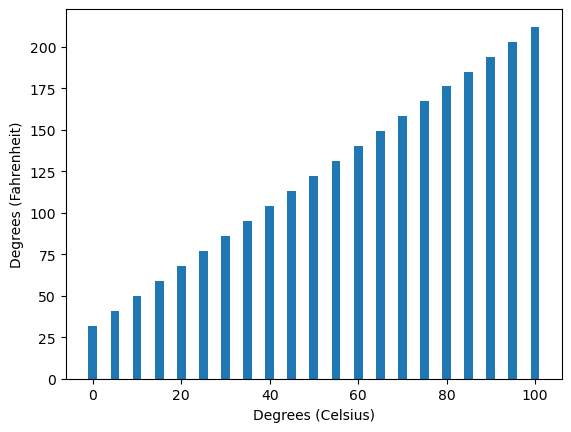

In [3]:
import matplotlib.pyplot as plt
def celtofah(celtemp):
    return (9/5) * celtemp + 32

cellist = []
fahlist = []
for celsius in range(0, 101, 5):
    cellist.append(celsius)
    fahlist.append(celtofah(celsius))

plt.bar(cellist, fahlist, align = 'center', width = 2)
plt.xlabel('Degrees (Celsius)')
plt.ylabel('Degrees (Fahrenheit)')


# Exercise 4.10
Write a script that plays "guess the number". Choose the number to be guessed by selecting a random integer in the range 1 to 1000. Do not reveal the number to the user. Display the prompt "Guess my number between 1 and 1000 with the fewest guesses:". The player inputs a first guess. If the guess is incorrect, display "Too high. Try again." or "Too low. Try again" as appropriate to help the player, then prompt the users for the next guess. When the user enters the correct answer, display "Congratulations. You guessed the number!" and allow the user to choose whether to play again.

In [ ]:
import random 

def new_game(numlow, numhigh):
    print(f'Playing a guessing game with a number between {numlow} and {numhigh}')
    return random.randint(numlow,numhigh)

In [ ]:
def check_guess(guess,answer):
    correct = False
    if guess < answer:
        print('Your guess is too low.  Try again.')
    elif guess > answer:
        print('Your guess is too high.  Try again.')
    else:
        correct = True
        print('Congratulations.  You guessed the number!')
    return correct
        

In [ ]:
game_over = False
numlow = 1
numhigh = 1000
while not game_over:
    answer = new_game(numlow,numhigh)
    correct = False
    while not correct:
        guess = input(f'Guess a value between {numlow} and {numhigh}: ')
        correct = check_guess(int(guess),answer)
    play_again = input('Play again (yes/no)?')
    if play_again == 'no':
        game_over = True
        
print('Thank you for playing ')

# Basic Data Structures in Python

### Simulating Stacks with Lists 
* Recall that Stacks are a Last-in, first out (LIFO) abstract data type.
* While Python does not have a built-in stack type, we can use a _constrained list_ to simulate one.
* The constrained list will only allow us to _push_ (add) elements onto the stack at the end using the `append` method.
* At the same time, the method `pop` can be used to _pop_ elements off the end for retrieval.
* When we look at custom classes, we will see how we can enforce items being added/removed solely in this manner.

In [ ]:
mystack = []
mystack.append('red') #adds 'red' "to the top"
print(mystack)
mystack.append('green') #adds 'green' "to the top"
print(mystack)
mystack.append('blue') #adds 'blue' "to the top"
print(mystack)

In [ ]:
for _ in range(len(mystack)): #Remember that we technically don't HAVE to use the iterator value in our loop
    print(mystack.pop()) #removes and returns the item added last


### Simulating Queues with Lists 
* A Queue is a "First-in first-out" (FIFO) abstract data type.
* Queues represent a more "fair" means of adding and removing items or entities, as they are processed on a "first-come, first-served" basis.  
* An efficient queue in Python can be constructed using the `deque` collection and `popleft` command (which returns from the beginning of the collection).
* Alternatively, we could we could use `pop(0)` to remove and return from a standard list, but this approach is less efficient.


In [ ]:
from collections import deque 
myqueue = deque() #Create an empty queue
myqueue.append('Mary') #adds Mary "to the end of the line"
print(myqueue)
myqueue.append('James') #adds James "to the end of the line"
print(myqueue)
myqueue.append('Roberta') #adds Roberta "to the end of the line"
print(myqueue)

In [ ]:
for _ in range(len(myqueue)): #Remember that we technically don't HAVE to use the iterator value in our loop
    print(myqueue.popleft()) #Processes the first person in line


# Creating a List Using List Comprehensions
* We can use a `for` loop and iterate over a sequence of numbers, etc. to create a list from scratch 
* In general, this is not considered the most _Pythonic_ way of doing things, because it's not concise (3+ statements to accomplish one task) and there is a preferred alternative.
* A **List Comprehension** is a concise means of applying a function or operation(s) to a list (or creating one from scratch).
* In constructing a new list, the simplest list comprehension format we can use is \<list_name\>=\[item `for` item in \<iterable expression\>\]

In [ ]:
list1 = [1,2,3,4,5]
list2 = [item for item in list1 if item%2==1]
print(list2)

In [ ]:
list1 = [] #3 Standard loop requires 3 lines to put every number from 1 to 10 in a list.
for item in range(1, 11):
    list1.append(item)
print(list1)

In [ ]:
list2 = [item for item in range(1,11)] #1 line to perform the same task using comprehension
print(list2)

### More Details on List Comprehension
* In the above, the `for` clause iterates over the sequence of numbers produced by `range(1, 11)`. 
* For each `item`, the list comprehension evaluates the expression to the left of the `for` clause and places the expression’s value in the new list. 
* Note that any iterable expression can be used (e.g. lists, tuples, etc.)
* In addition, we can use _mapping_ with list comprehension to produce a list with the same number elements in the original data but with modified values.


In [ ]:
#mapping elements of original range using a simple linear equation (3x-1)
list3 = [3 * item -1 for item in range(0, 10)] 
print(list3)

In [ ]:
print(list1)
list4 =[item**2 for item in list1] #Using an existing list with comprehension instead of range
print(list4)

In [ ]:
list5 = [item.upper() for item in 'of mice and men'] #Using a string with comprehension
print(list5)

### Filtering List Comprehensions with `if` Clauses 
* Our above examples all include the same number of elements as the original iterable expression.
* Another common functional-style programming operation is **filtering** elements to select only those that match a condition. 
* The result is a list with a number of elements _less than or equal_ to the original number produced by the iterable expression being filtered.

In [ ]:
#Note that we can use any variable in place of "item"
list6 = [ele for ele in range(1, 11) if ele % 2 == 0] #even numbers in the range from 1 to 10
print(list6)

In [ ]:
def isvowel(letter):
    return letter.lower() in ['a','e','i','o','u']

In [ ]:
list7 = [item for item in 'Odds and Evens' if isvowel(item)]
print(list7)

# Generator Expressions
* **Generator objects** are similar to list comprehensions, but create iterable objects that produce values _on demand_. 
* This approach is commonly referred to as _lazy evaluation_. 
* For large numbers of items, creating lists can take substantial memory and time, while generator expressions can produce values as needed (and thus not consume as much active memory at any given time).

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
for value in (x ** 2 for x in numbers if x % 2 != 0): #Standard printing of elements -- reasonable choice for small lists/elements
    print(value, end='  ')

In [ ]:
squares_of_odds_4digit = (x ** 2 for x in range(1000,10000) if x % 2 == 1) #Generators are ideal with larger lists/elements
print(squares_of_odds_4digit)

### Using Generator Objects in Practice
* The above output indicates that `square_of_odds_4digit` is a **generator object** that was created from a **generator expression (`<genexpr>`)**.
* The built-in function `next` receives a generator or iterator and returns the next item in the sequence.

In [ ]:
for _ in range(5): #execute the loop 5 times    
    print(next(squares_of_odds_4digit)) #Each call to next will generate and return the next element in the generated sequence



### Filtering a Sequence’s Values with the Built-In `filter` Function
* In Python, functions are _themselves_ objects that you can assign to variables, pass to other functions and return from functions. 
* Functions that receive other functions as arguments are generally referred to as **higher-order functions**. 
* `filter` is a higher-order function whose first argument is a single-argument function that must return `True` when an item meets some criteria (ex: is odd), and its second argument is an iterable expression 
* Higher-order functions may also return a function as a result.
* `filter`’s results are not produced until you iterate through them (i.e. via lazy evaluation). 

In [ ]:
numbers = [10, 3, 7, 1, 9, 4, 2, 8, 5, 6]

In [ ]:
def is_odd(x): #A single argument function compatible with filter
    """Returns True only if x is odd."""
    return x % 2 != 0 #Note -- a boolean value must be returned.

In [ ]:

print(filter(is_odd, numbers)) #filter the original numbers list using the **is_odd** function


In [ ]:
for f_ele in filter(is_odd, numbers): #We need to actually do something with the filter object to "see" the values
    print(f_ele)

### Using a `lambda` Rather than a def For Functions 
* For simple functions like `is_odd` that `return` only a _single expression’s value_, you can use a **lambda expression** (or simply a **lambda**) to define the function inline. 
* Unless inline functions can be kept relatively simple, they should be avoided for the sake of readability
* A lambda expression is an _anonymous function_
    * An anonymous function is one defined without a formal name (but can still be assigned to a variable).
    * While normal functions are defined using the def keyword, anonymous functions are defined using the lambda keyword.

In [ ]:
list(filter(lambda x: x % 2 != 0, numbers))

## The `map` Function
* `map` is a higher order function that applys a transformative function (first argument) to an iterable expression (second argument). 
* Like `filter`, the `map`’s first argument is a function that receives one value.
* Unlike `filter`, map applies a function that can return a value of _any_ type. 

In [ ]:
numbers = [10, 3, 7, 1, 9, 4, 2, 8, 5, 6]
numbers_squared_list = list(map(lambda x: x ** 2, numbers))
numbers_squared_tuple = tuple(map(lambda x: x ** 2, numbers))

print(numbers)
print(numbers_squared_list)
print(numbers_squared_tuple)

In [ ]:
print([item ** 2 for item in numbers])

### Combining `filter` and `map`
* It's entirely possible to combine map and filter in a single statement.
* Note that this may not be the best idea if readability is sacrificed.
* It may be better to use a meaningful intermediate variable (remember you won't really lose efficiency this way, since `filter` returns a generator object.) 

In [ ]:
print(list(map(lambda x: x ** 2, #using a single combined filter-map statement
         filter(lambda x: x % 2 != 0, numbers))))

In [ ]:
oddnum = filter(lambda x: x % 2 != 0, numbers) #Using an intermediate variable
print(oddnum)
print(list(map(lambda x: x ** 2,oddnum)))

In [ ]:
[x ** 2 for x in numbers if x % 2 != 0] #equivalent list comprehension

# Other Sequence Processing Functions 

In [ ]:
print('Zebra' < 'apple') #The output of this `print` may seem wrong, but it's absolutely correct.
#We need to address the mechanics behind this behavior.

### Finding the Minimum and Maximum Values Using a Key Function
* Strings in Python are compared by default using **Lexicographic order** -- each character and symbol has an associated numeric index indicating its order in a complete symbolic alphabet.  
* `'R'` “comes after” `'o'` in the alphabet, so you might expect `'Red'` to be less than `'orange'` and the previous condition  to be `False`. 
* But this comparison is based on characters’ underlying _numerical values_, and lowercase letters have _higher_ numerical values than uppercase letters. 
* Confirm with built-in function **`ord`**:

In [ ]:
print(f'R\'s index: {ord("R")} | o\'s index: {ord("o")} ')

### String comparison: More Detail
You can use ( ```>``` , ```<``` , ```<=``` , ```<=``` , ```==``` , ```!=```  ) to compare two strings. Python compares strings lexicographically i.e using ASCII value of the characters.

Suppose you have ```str1``` as "Mary"  and ```str2``` as "Mac". The first two characters from ```str1```  and ```str2``` ( M and M ) are compared. As they are equal, the second two characters are compared. Because they are also equal, the third two characters (r and c ) are compared. And because r has greater ASCII value than c, ```str1``` is greater than ```str2```

In [ ]:
colors = ['Red', 'orange', 'Yellow', 'green', 'Blue']
colors.sort() #lexicographic sort
print(colors)

### Using a `key` argument in functions
* Assume that we’d like to sort the previous list of strings using _alphabetical_ order.
* Many built-in functions (including sort) permit the use of a **key** function, which lets us substitute a particular value or transformation  in determining element order.
* In this case we will use the `lower` method to insure that sorting uses alphabetical instead of lexicographic order in organization.

In [ ]:
colors = ['Red', 'orange', 'Yellow', 'green', 'Blue']
colors.sort(key=lambda s: s.lower()) #alphabetical sort
print(colors)